In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

import seaborn as sns


In [168]:
sns.load_dataset('iris').head()




,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [169]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


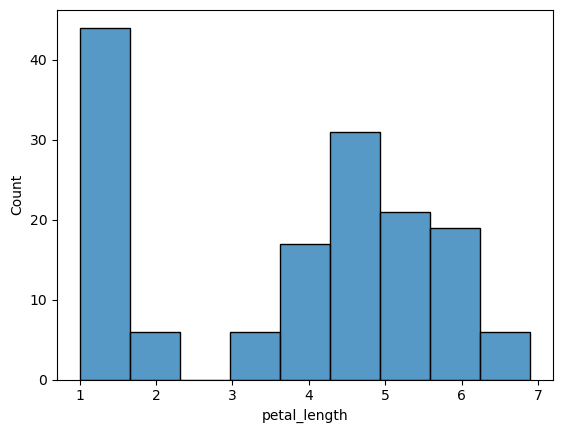

In [170]:
# What does the distribution of petal lengths look like?

# sns.histplot(iris_df.petal_length)
sns.histplot(data=iris_df, x='petal_length')
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


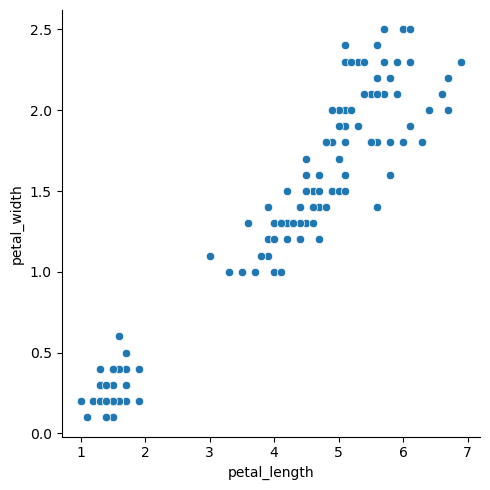

In [171]:
# Is there a relationship between petal length and petal width?


sns.relplot(x='petal_length', y='petal_width', data=iris_df)
plt.show()

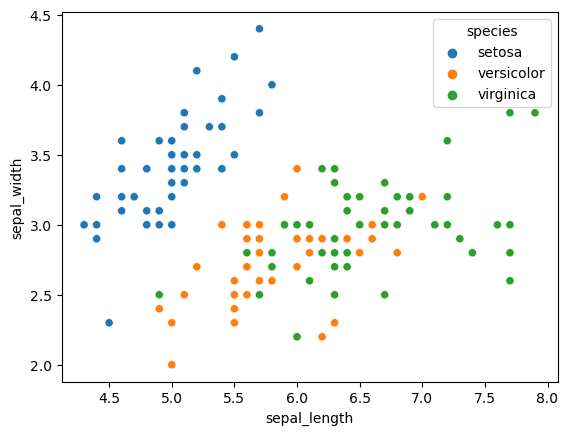

It does not appear reasonable to predict species based on sepal width and length


In [36]:
# Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two 
# numeric columns through the lense of a categorical column.


# Create a scatter plot to visualize the relationship between sepal width and length
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris_df, hue='species')
plt.show()

print(f'It does not appear reasonable to predict species based on sepal width and length')

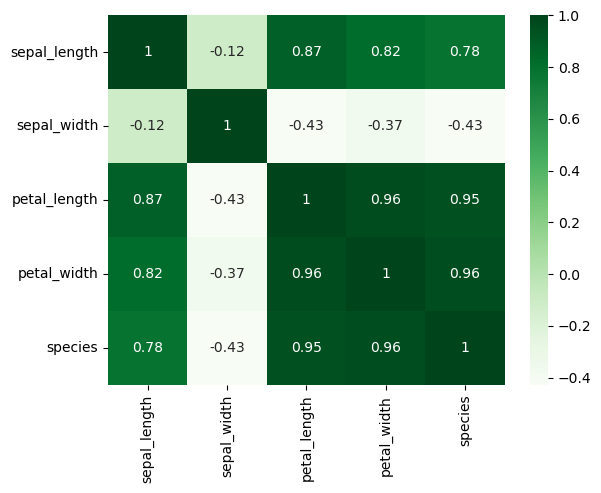

In [37]:
# Which features would be best used to predict species?

# Convert the species names to integers based on their lengths
species_length_mapping = {length: index for index, length in enumerate(iris_df['species'].str.len().unique())}
iris_df['species'] = iris_df['species'].str.len().map(species_length_mapping)


sns.heatmap(iris_df.corr(), annot=True, cmap='Greens')
plt.show()

In [38]:
# Load the anscombe dataset from seaborn. Use pandas to group the data by the dataset column, and calculate summary 
# statistics for each dataset. What do you notice?

ans_df =sns.load_dataset('anscombe')

ans_df.head(5)



,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [39]:
ans_df.groupby('dataset').describe()

print(f'there are 4 datasets with all the same count')

there are 4 datasets with all the same count


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


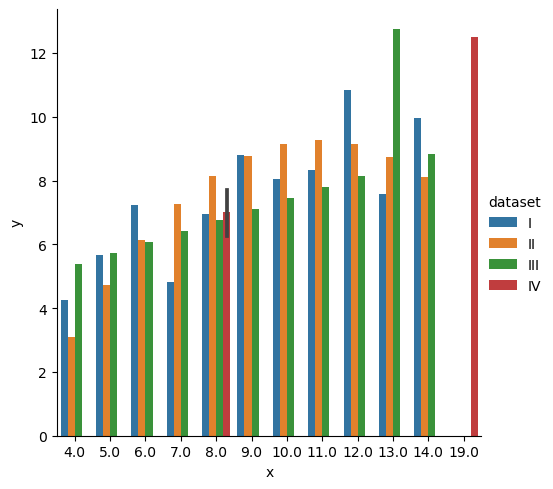

In [40]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.


sns.catplot(data=ans_df, y='y', x='x', hue='dataset', kind='bar')
plt.show()

# sns.relpot(data=ans_df, x)

In [49]:

# Load the InsectSprays dataset from pydataset and read it's documentation. 

is_df=data('InsectSprays')
is_df.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<Axes: xlabel='spray', ylabel='count'>

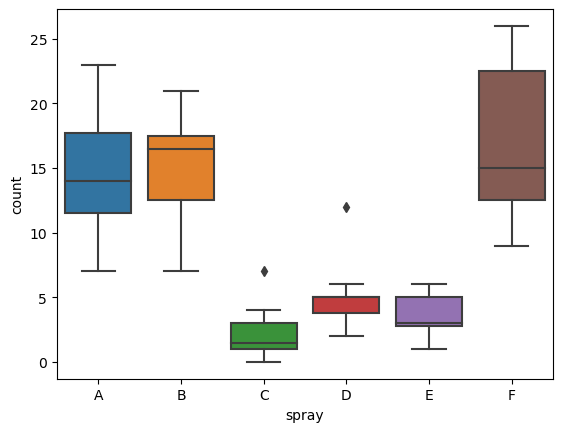

In [52]:
# Create a boxplot that shows the effectiveness of the different insect sprays.

sns.boxplot(data=is_df, x='spray', y='count')

In [59]:
# Load the swiss dataset from pydataset and read it's documentation. Create visualizations to answer the following 
# questions:
swiss_df = data('swiss')
swiss_df.head()
swiss_df.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [68]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
swiss_df['is_catholic'] = swiss_df['Catholic'] > 50
swiss_df['is_catholic'].value_counts()

is_catholic
False    29
True     18
Name: count, dtype: int64

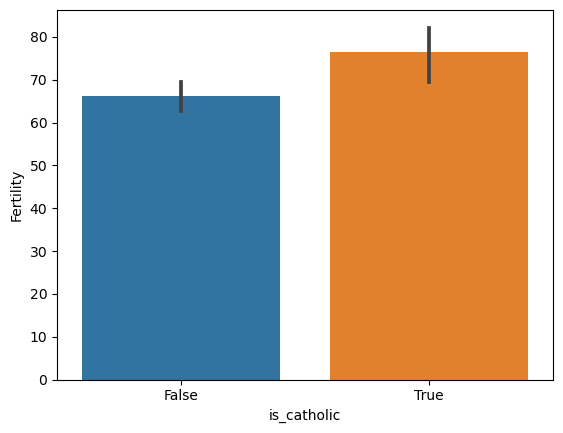

Being catholic appears to influence fertility but the findings indicate a low confidence interval


In [72]:
# (Choose a cutoff point for what constitutes catholic)
# Does whether or not a province is Catholic influence fertility?

sns.barplot(data=swiss_df, y='Fertility', x='is_catholic')
plt.show()

print(f'Being catholic appears to influence fertility but the findings indicate a low confidence interval')

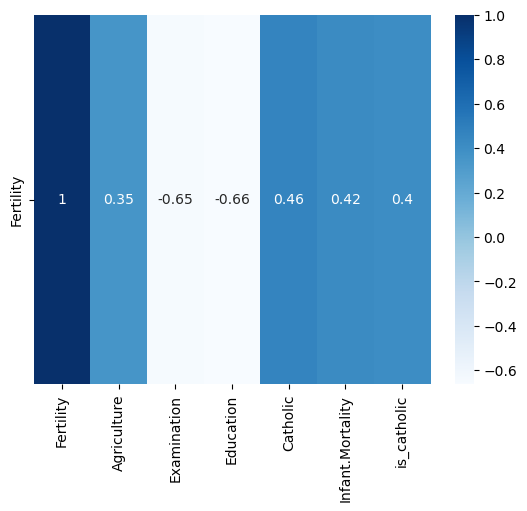

catholic correlates most strongly with education


In [172]:
# What measure correlates most strongly with fertility?


sns.heatmap(swiss_df.corr()[:1], annot=True, cmap='Blues')
plt.show()

print(f'catholic correlates most strongly with education')

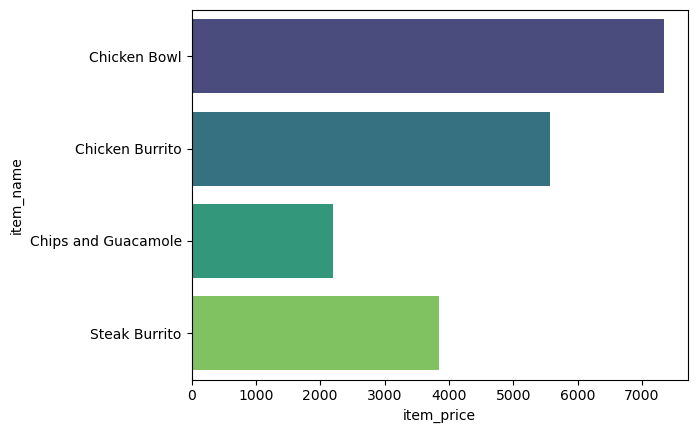

In [179]:
# Load the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue 
# produced by each.
import env
from env import get_db_url

url=get_db_url(env.user,env.host,env.password, 'chipotle')

chipotle_df = pd.read_sql('SELECT * FROM orders', url)

chipotle_df['item_price']= chipotle_df['item_price'].str.replace('$', '')
chipotle_df['item_price']= chipotle_df['item_price'].astype(float)


top_popular = chipotle_df.groupby('item_name')[['item_price','quantity']].sum().sort_values(by='quantity', ascending=False).head(4)

sns.barplot(y=top_popular.index, x='item_price', data=top_popular, palette='viridis');

<Axes: xlabel='Days', ylabel='Reaction'>

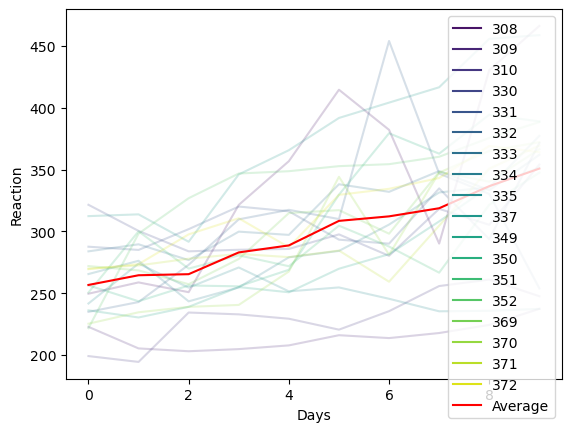

In [181]:
# Load the sleepstudy dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all 
# the individual subject's reaction times and a more prominant line showing the average change in reaction time.

sleep_df = data('sleepstudy')
sleep_df.head() 
sleep_df.Subject = sleep_df.Subject.astype(str)
sleep_df.groupby('Subject').describe()

# avg_reaction_subject = sleep_df.groupby('Subject')[['Reaction']].mean()
avg_reaction_days = sleep_df.groupby('Days')[['Reaction']].mean()
# print(avg_reaction_days)

sns.lineplot(x='Days', y='Reaction', data=sleep_df, hue='Subject', palette ='viridis', alpha=.2)
sns.lineplot(x=avg_reaction_days.index, y='Reaction', data=avg_reaction_days, color='red', label='Average')
# sns.lineplot(x=daily_avg_change.index, y='Reaction', data=daily_avg_change, color='blue', label='Daily Avg Change')
